In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fake-news-detection-datasets/News _dataset/True.csv
/kaggle/input/fake-news-detection-datasets/News _dataset/Fake.csv


# Load Library

In [2]:
from warnings import filterwarnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [3]:
TrueNews = pd.read_csv("/kaggle/input/fake-news-detection-datasets/News _dataset/True.csv")
FakeNews = pd.read_csv("/kaggle/input/fake-news-detection-datasets/News _dataset/Fake.csv")

In [4]:
TrueNews.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [5]:
TrueNews.columns

Index(['title', 'text', 'subject', 'date'], dtype='object')

In [5]:
TrueNews.shape

(21417, 4)

In [6]:
TrueNews.isna().sum()

title      0
text       0
subject    0
date       0
dtype: int64

In [8]:
FakeNews.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [7]:
FakeNews.shape

(23481, 4)

In [8]:
FakeNews.columns

Index(['title', 'text', 'subject', 'date'], dtype='object')

In [9]:
FakeNews.isna().sum()

title      0
text       0
subject    0
date       0
dtype: int64

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


[Text(0.5, 0, 'Month')]

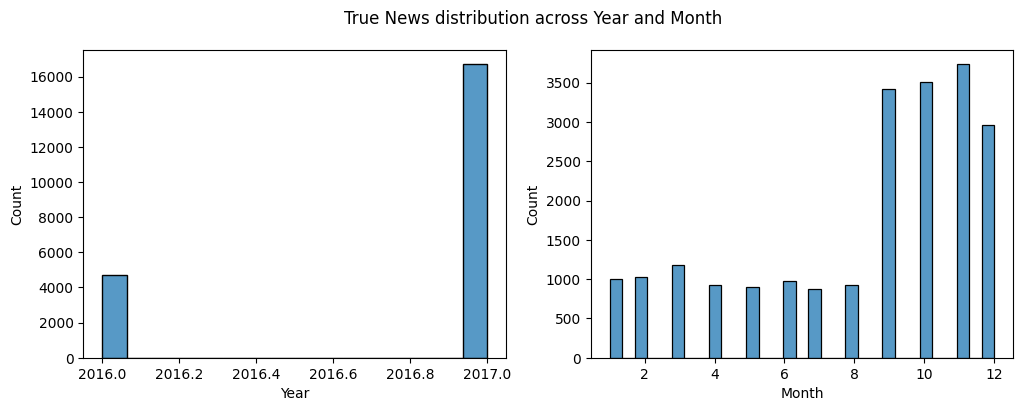

In [10]:
fig,axes = plt.subplots(1,2,figsize=(12,4))
fig.suptitle('True News distribution across Year and Month')
sns.histplot(ax=axes[0],data=pd.DatetimeIndex(TrueNews['date']).year)
axes[0].set(xlabel='Year')
sns.histplot(ax=axes[1],data=pd.DatetimeIndex(TrueNews['date']).month)
axes[1].set(xlabel='Month')

In [11]:
FakeNews["date"].str.contains("https").sum()

9

In [12]:
FakeNews = FakeNews[~FakeNews["date"].str.contains("https")]

In [13]:
FakeNews["date"].str.contains("https").sum()

0

In [14]:
FakeNews.reset_index(drop=True,inplace=True)

In [15]:
FakeNews = FakeNews.drop(18926)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


[Text(0.5, 0, 'Month')]

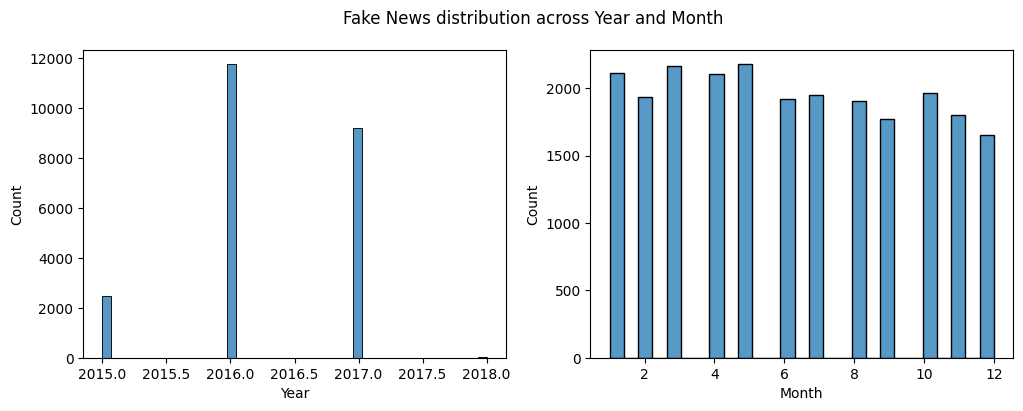

In [16]:
fig,axes = plt.subplots(1,2,figsize=(12,4))
fig.suptitle('Fake News distribution across Year and Month')
sns.histplot(ax=axes[0],data=pd.DatetimeIndex(FakeNews['date']).year)
axes[0].set(xlabel='Year')
sns.histplot(ax=axes[1],data=pd.DatetimeIndex(FakeNews['date']).month)
axes[1].set(xlabel='Month')

Text(0.5, 1.0, 'FakeNews composition')

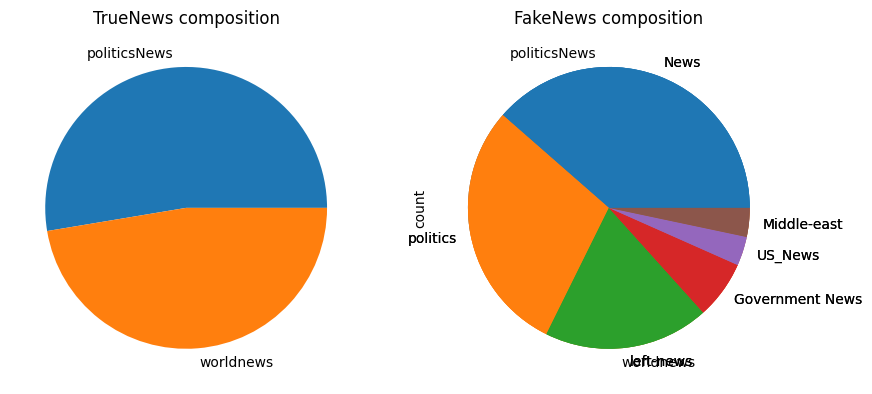

In [19]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10,10))
tmp = TrueNews['subject'].value_counts()
ax1.pie(tmp, labels = list(tmp.index))
TrueNews['subject'].value_counts().plot.pie()
ax1.set_title("TrueNews composition")
tmp = FakeNews['subject'].value_counts()
ax2.pie(tmp, labels = list(tmp.index))
FakeNews['subject'].value_counts().plot.pie()
ax2.set_title("FakeNews composition")

In [17]:
# delete unrelated clolumns
TrueNews.drop(['subject','date'],axis=1,inplace=True)
FakeNews.drop(['subject','date'],axis=1,inplace=True)

# Text preprocessing

In [18]:
nltk.download('stopwords')
from nltk.corpus import stopwords
from textblob import Word, TextBlob
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
cmd = "unzip -d /usr/share/nltk_data/corpora/ /usr/share/nltk_data/corpora/wordnet.zip"
os.system(cmd)
os.system("ls /usr/share/nltk_data/corpora/wordnet*")

[nltk_data] Error loading stopwords: <urlopen error [Errno -3]
[nltk_data]     Temporary failure in name resolution>
[nltk_data] Error loading punkt: <urlopen error [Errno -3] Temporary
[nltk_data]     failure in name resolution>
[nltk_data] Error loading wordnet: <urlopen error [Errno -3] Temporary
[nltk_data]     failure in name resolution>
[nltk_data] Error loading omw-1.4: <urlopen error [Errno -3] Temporary
[nltk_data]     failure in name resolution>
Archive:  /usr/share/nltk_data/corpora/wordnet.zip
   creating: /usr/share/nltk_data/corpora/wordnet/
  inflating: /usr/share/nltk_data/corpora/wordnet/lexnames  
  inflating: /usr/share/nltk_data/corpora/wordnet/data.verb  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.adv  
  inflating: /usr/share/nltk_data/corpora/wordnet/adv.exc  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.verb  
  inflating: /usr/share/nltk_data/corpora/wordnet/cntlist.rev  
  inflating: /usr/share/nltk_data/corpora/wordnet/data.adj  
  inf

0

In [22]:
def lemmatize_with_postag(sentence):
    sent = TextBlob(sentence)
    tag_dict = {"J": 'a', 
                "N": 'n', 
                "V": 'v', 
                "R": 'r'}
    words_and_tags = [(w, tag_dict.get(pos[0], 'n')) for w, pos in sent.tags]    
    lemmatized_list = [wd.lemmatize(tag) for wd, tag in words_and_tags]
    return " ".join(lemmatized_list)

In [19]:
def text_preprocess(textColumn):
    textColumn = textColumn.str.lower()                         #transform to lower case
    textColumn = textColumn.str.replace('[^\w\s]','',regex=True) # remove punction
    textColumn = textColumn.str.replace('\d', '', regex=True)     #remove number
    sw = stopwords.words('english')
    textColumn = textColumn.apply(lambda x: " ".join(x for x in str(x).split() if x not in sw)) # remove stop words
    words_count = pd.Series(' '.join(textColumn).split()).value_counts()
    rare_word = words_count[words_count<=1]
    textColumn = textColumn.apply(lambda x: " ".join(x for x in x.split() if x not in rare_word)) #remove rare words
    textColumn = textColumn.apply(lambda x: lemmatize_with_postag(x)) #Lemmatization:  reduces different inflected forms of words (like 'running' to 'run') to their base form. 
    return textColumn
                                  
    

In [23]:
TrueNews["text"]=text_preprocess(TrueNews["text"])

In [24]:
import tensorflow as tf

device_name = tf.test.gpu_device_name()

if "GPU" not in device_name:
    print("GPU device not found")
    
print('Found GPU at: {}'.format(device_name))

print("GPU", "available (YESS!!!!)" if tf.config.list_physical_devices("GPU") else "not available :(")

2024-04-16 03:23:19.385691: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-16 03:23:19.385799: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-16 03:23:19.511604: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Found GPU at: /device:GPU:0
GPU available (YESS!!!!)


In [25]:
FakeNews["text"]=text_preprocess(FakeNews["text"])

In [26]:
#del FakeNews

# Train, test and validation data split

In [26]:
import warnings
warnings.filterwarnings("ignore")

In [27]:
FakeNews["class"] = 0
TrueNews["class"] = 1

In [28]:
df_merge = pd.concat([FakeNews, TrueNews], axis =0 )
df_merge.head(10)

,title,text,class
0,Donald Trump Sends Out Embarrassing New Year’...,donald trump wish american happy new year leav...,0
1,Drunk Bragging Trump Staffer Started Russian ...,house intelligence committee chairman devin nu...,0
2,Sheriff David Clarke Becomes An Internet Joke...,friday reveal former milwaukee sheriff david c...,0
3,Trump Is So Obsessed He Even Has Obama’s Name...,christmas day donald trump announce would back...,0
4,Pope Francis Just Called Out Donald Trump Dur...,pope francis use annual christmas day message ...,0
5,Racist Alabama Cops Brutalize Black Boy While...,number case cop brutalize kill people color se...,0
6,"Fresh Off The Golf Course, Trump Lashes Out A...",donald trump spend good portion day golf club ...,0
7,Trump Said Some INSANELY Racist Stuff Inside ...,wake yet another court decision derail donald ...,0
8,Former CIA Director Slams Trump Over UN Bully...,many people raise alarm regard fact donald tru...,0
9,WATCH: Brand-New Pro-Trump Ad Features So Muc...,might think get break watch people kiss donald...,0


In [31]:
df_merge = df_merge.sample(frac = 1)

In [32]:
df_merge.reset_index(inplace = True)
df_merge.drop(["index"], axis = 1, inplace = True)

In [33]:
df_merge.head()

,title,text,class
0,Bill O’Reilly DESTROYS Donald Trump In A Rant...,grow sign rumor fox news split gop frontrunner...,0
1,Judge orders Rosneft CEO Sechin to appear as w...,moscow reuters russian judge wednesday order i...,1
2,#SteveBannon’s Secret “To Do” List Is Accident...,president trump chief strategist steve bannon ...,0
3,U.S. GMO food labeling bill passes Senate,reuters u senate thursday approved legislation...,1
4,NAACP DEMANDS An Apology From Trump For Tellin...,hill reportedthe naacp president cornell willi...,0


In [35]:
x = df_merge["text"]
y = df_merge["class"]

In [38]:
x_train, x_test_valid, y_train, y_test_valid = train_test_split(x, y, test_size=0.3)

In [39]:
x_test, x_valid, y_test, y_valid = train_test_split(x_test_valid, y_test_valid, test_size = 0.33)

In [40]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorization = TfidfVectorizer()
xv_train = vectorization.fit_transform(x_train)
xv_test = vectorization.transform(x_test)
xv_valid = vectorization.transform(x_valid)

# Logistic regression model

In [41]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression()
LR.fit(xv_train,y_train)

LogisticRegression()

In [42]:
pred_lr=LR.predict(xv_test)

In [43]:
LR.score(xv_test, y_test)

0.9868100199512303

In [46]:
print(classification_report(y_test, pred_lr))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4675
           1       0.99      0.99      0.99      4347

    accuracy                           0.99      9022
   macro avg       0.99      0.99      0.99      9022
weighted avg       0.99      0.99      0.99      9022



# DecisionTreeClassifier Model

In [47]:
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier()
DT.fit(xv_train, y_train)

DecisionTreeClassifier()

In [48]:
pred_dt = DT.predict(xv_test)

In [49]:
DT.score(xv_test, y_test)

0.9944579915761472

In [50]:
print(classification_report(y_test, pred_dt))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4675
           1       0.99      0.99      0.99      4347

    accuracy                           0.99      9022
   macro avg       0.99      0.99      0.99      9022
weighted avg       0.99      0.99      0.99      9022



# Gradient Boosting Classifier

In [51]:
from sklearn.ensemble import GradientBoostingClassifier

GBC = GradientBoostingClassifier(random_state=123)
GBC.fit(xv_train, y_train)

GradientBoostingClassifier(random_state=123)

In [52]:
pred_gbc = GBC.predict(xv_test)

In [53]:
GBC.score(xv_test, y_test)

0.9951230325870095

In [54]:
print(classification_report(y_test, pred_gbc))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      4675
           1       0.99      1.00      0.99      4347

    accuracy                           1.00      9022
   macro avg       1.00      1.00      1.00      9022
weighted avg       1.00      1.00      1.00      9022



# Random Forest model

In [55]:
from sklearn.ensemble import RandomForestClassifier

RFC = RandomForestClassifier(random_state=123)
RFC.fit(xv_train, y_train)

RandomForestClassifier(random_state=123)

In [56]:
pred_rfc = RFC.predict(xv_test)

In [57]:
RFC.score(xv_test, y_test)

0.992130348038129

In [58]:
print(classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4675
           1       0.99      0.99      0.99      4347

    accuracy                           0.99      9022
   macro avg       0.99      0.99      0.99      9022
weighted avg       0.99      0.99      0.99      9022



# Validation

In [59]:
pred_rfc_valid = RFC.predict(xv_valid)

In [60]:
print(classification_report(y_valid, pred_rfc_valid))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2310
           1       0.99      0.99      0.99      2135

    accuracy                           0.99      4445
   macro avg       0.99      0.99      0.99      4445
weighted avg       0.99      0.99      0.99      4445



In [61]:
pred_gbc_valid = GBC.predict(xv_valid)

In [62]:
print(classification_report(y_valid, pred_gbc_valid))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      2310
           1       0.99      1.00      1.00      2135

    accuracy                           1.00      4445
   macro avg       1.00      1.00      1.00      4445
weighted avg       1.00      1.00      1.00      4445



In [63]:
pred_DT_valid = DT.predict(xv_valid)

In [64]:
print(classification_report(y_valid, pred_DT_valid))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2310
           1       1.00      1.00      1.00      2135

    accuracy                           1.00      4445
   macro avg       1.00      1.00      1.00      4445
weighted avg       1.00      1.00      1.00      4445



In [65]:
pred_LR_valid = LR.predict(xv_valid)

In [66]:
print(classification_report(y_valid, pred_LR_valid))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2310
           1       0.99      0.99      0.99      2135

    accuracy                           0.99      4445
   macro avg       0.99      0.99      0.99      4445
weighted avg       0.99      0.99      0.99      4445



# Conclusion
1. Logistic model, Decision Tree, Gradient boosting and Random forest model have similar almost perfect performance. 
2. The difference between True and Fake news are very easy to track even with the simple model. We can use this data to train and use independent data to test.